In [154]:
pip install pandas


[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [155]:
pip install matplotlib


[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [156]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 

In [157]:
#imporing the datasets in week2 file
cab = pd.read_csv('Cab_Data.csv')
city = pd.read_csv('City.csv')
customer_id = pd.read_csv('Customer_ID.csv')
transaction_id = pd.read_csv('Transaction_ID.csv')

In [158]:
#get the shape of the datasets
cab.shape, city.shape, customer_id.shape, transaction_id.shape
#shape of the datasets 
print("Cab Data = ", cab.shape)
print("City Data = ", city.shape)
print("Customer Data = ", customer_id.shape)
print("Transaction Data = ", transaction_id.shape)

#dropping the duplicates
cab.drop_duplicates, city.drop_duplicates, customer_id.drop_duplicates, transaction_id.drop_duplicates

#shape of the datasets after dropping the duplicates
print("Cab Data without duplicates = ", cab.shape)
print("City Data without duplicates = ", city.shape)
print("Customer Data without duplicates = ", customer_id.shape)
print("Transaction Data without duplicates = ", transaction_id.shape)


cab.isnull().sum()
city.isnull().sum()
customer_id.isnull().sum()
transaction_id.isnull().sum()
#print for NA values and missing values
print("Cab data null values = ",cab.isnull().sum())
print("City data null values = ",city.isnull().sum())
print("Customer data null values = ",customer_id.isnull().sum())
print("Transaction data null values = ",transaction_id.isnull().sum())

#Conclusion : There are no missing values in the datasets and no duplicates in the datasets




Cab Data =  (359392, 7)
City Data =  (20, 3)
Customer Data =  (49171, 4)
Transaction Data =  (440098, 3)
Cab Data without duplicates =  (359392, 7)
City Data without duplicates =  (20, 3)
Customer Data without duplicates =  (49171, 4)
Transaction Data without duplicates =  (440098, 3)
Cab data null values =  Transaction ID    0
Date of Travel    0
Company           0
City              0
KM Travelled      0
Price Charged     0
Cost of Trip      0
dtype: int64
City data null values =  City          0
Population    0
Users         0
dtype: int64
Customer data null values =  Customer ID           0
Gender                0
Age                   0
Income (USD/Month)    0
dtype: int64
Transaction data null values =  Transaction ID    0
Customer ID       0
Payment_Mode      0
dtype: int64


In [159]:
pip install seaborn


[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [160]:
from datetime import datetime, timedelta
def to_date_format(n):
    if pd.notna(n):
        date_str = (datetime(1900, 1, 1) + timedelta(days=int(n))).strftime("%d-%m-%Y")
        date_date = datetime.strptime(date_str, "%d-%m-%Y")
        return date_date
    else:
        return pd.NaT

In [161]:
cab['Date of Travel'] = cab['Date of Travel'].apply(lambda x:to_date_format(x))

In [162]:
print(cab['Date of Travel'])

0        2016-01-10
1        2016-01-08
2        2016-01-04
3        2016-01-09
4        2016-01-05
            ...    
359387   2018-01-10
359388   2018-01-06
359389   2018-01-07
359390   2018-01-07
359391   2018-01-04
Name: Date of Travel, Length: 359392, dtype: datetime64[ns]


Shape of the new dataset =  (359392, 14)


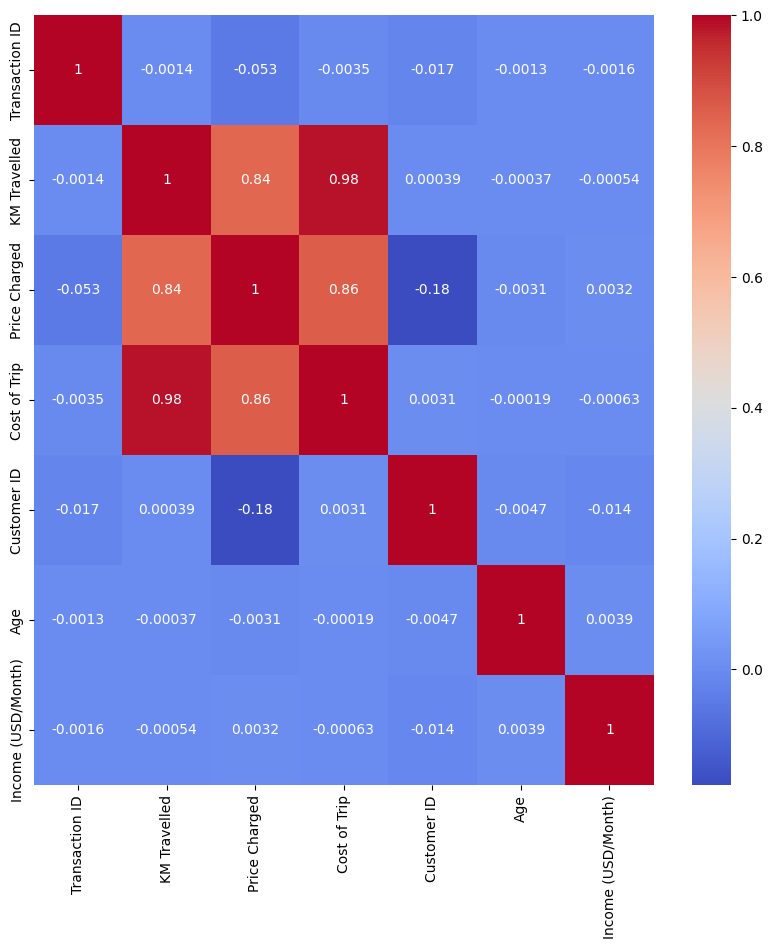

In [163]:
#merge the datasets and create a new dataset
#after merging the datasets, compare different paratmeters of the different features to 
#draw conclusions and make decisions for the company

#merging the datasets based on foreign keys
#merging cab and transaction datasets
cab_transaction = pd.merge(cab, transaction_id, on='Transaction ID')
cab_transaction.head()

#merging cab_transaction and customer_id datasets
cab_transaction_customer = pd.merge(cab_transaction, customer_id, on='Customer ID')
cab_transaction_customer.head()

#merging cab_transaction_customer and city datasets
cab_transaction_customer_city = pd.merge(cab_transaction_customer, city, on='City')
cab_transaction_customer_city.head()

#shape of the new dataset
#print(cab_transaction_customer_city)
print("Shape of the new dataset = ", cab_transaction_customer_city.shape)

cab_transaction_customer_city

#plot correlation heat map
import seaborn as sns
numeric_columns = cab_transaction_customer_city.select_dtypes(include=['float64', 'int64'])

# Plotting the correlation heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(numeric_columns.corr(), annot=True, cmap='coolwarm')
plt.show()


#Conclusion : There is a strong correlation between the following features
#1. Price Charged and Cost of Trip
#2. Price Charged and Customer ID
#3. Cost of Trip and Customer ID



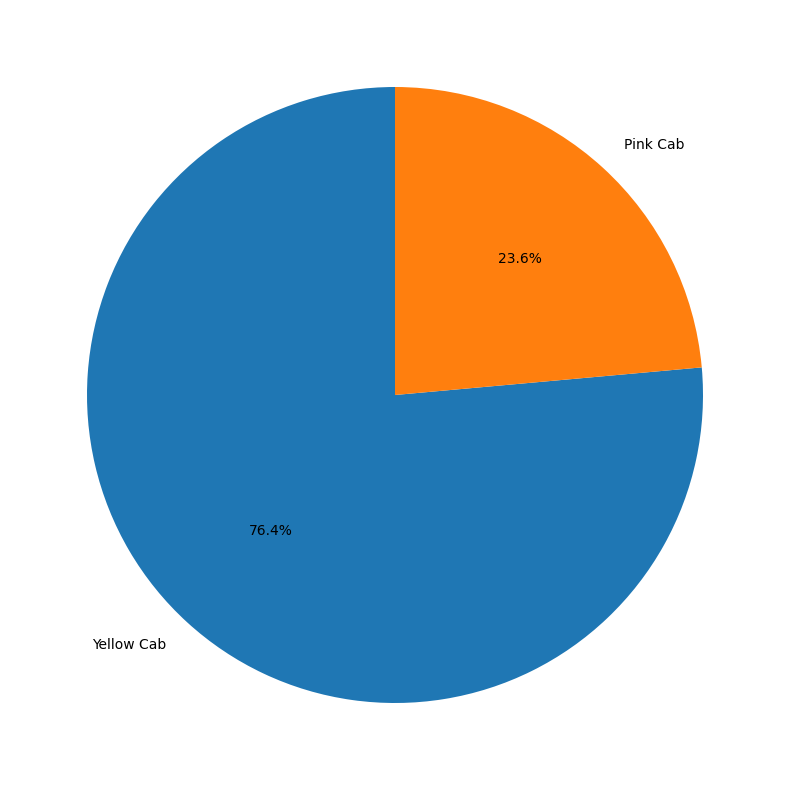

In [164]:
#pie chart to show pink vs yellow cab users
plt.figure(figsize=(10,10))
plt.pie(cab_transaction_customer_city['Company'].value_counts(), labels=cab_transaction_customer_city['Company'].value_counts().index, autopct='%1.1f%%', startangle=90)
plt.show()

#Conclusion : 76.4% of the users use Yellow Cab and 23.6% of the users use Pink Cab


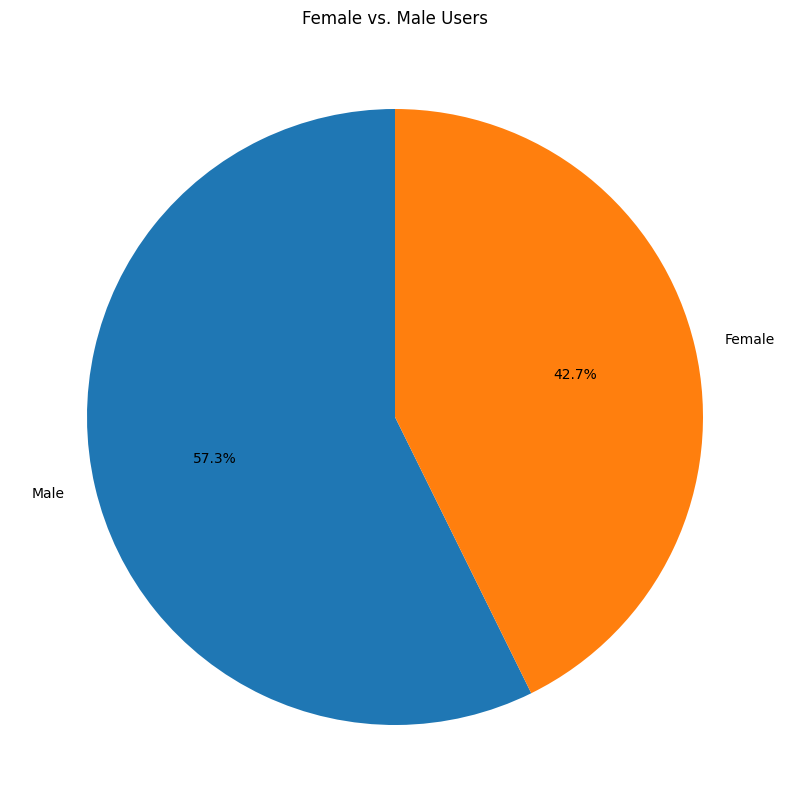

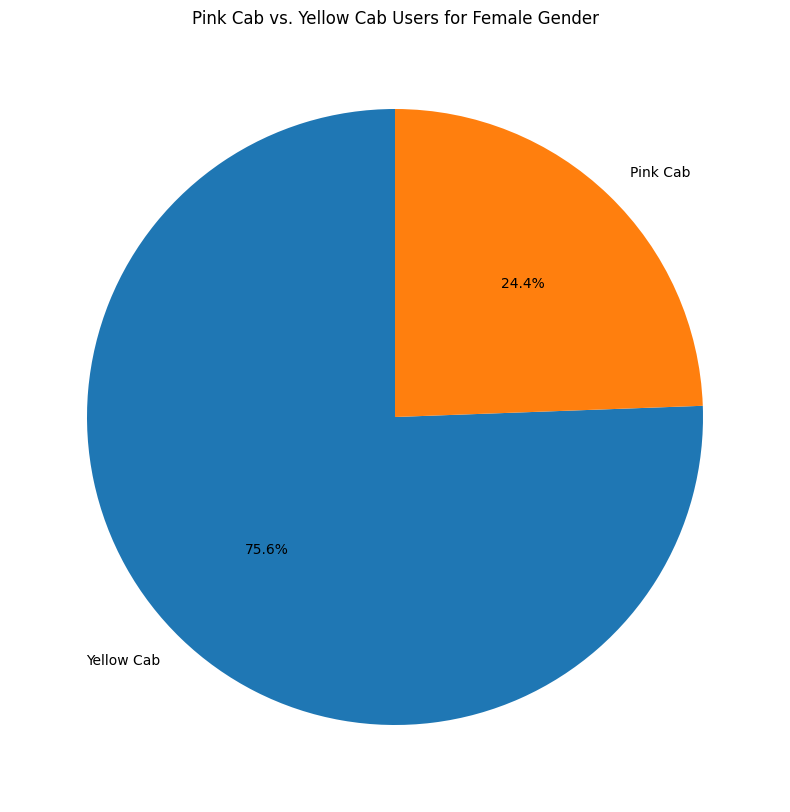

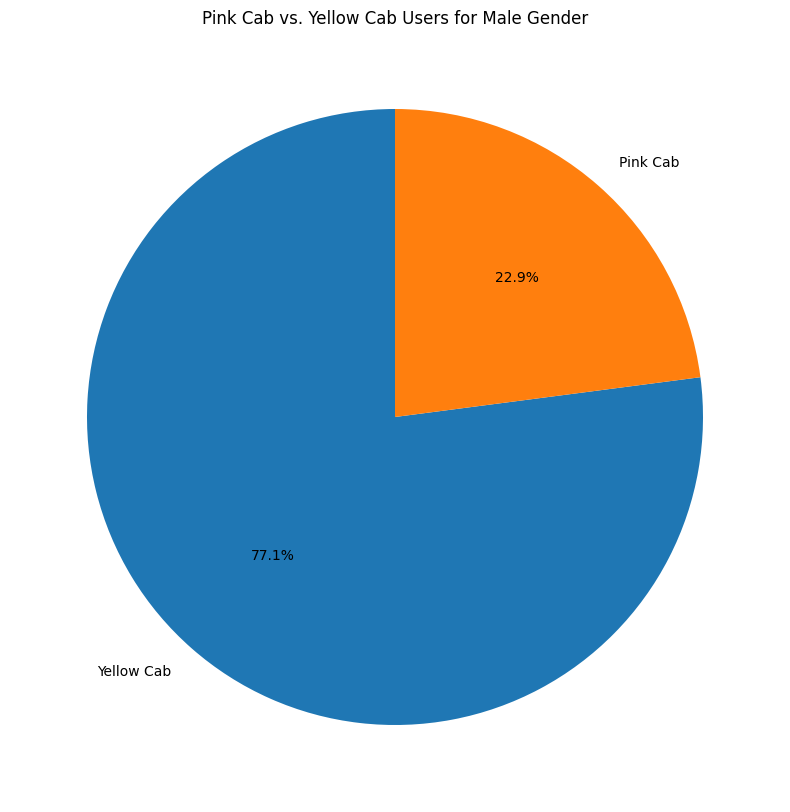

In [165]:
##pie chart to show cab users based on gender
plt.figure(figsize=(10,10))
plt.pie(cab_transaction_customer_city['Gender'].value_counts(), labels=cab_transaction_customer_city['Gender'].value_counts().index, autopct='%1.1f%%', startangle=90)
plt.title('Female vs. Male Users')
plt.show()


#pie chart to pink cab users vs yellow cab users for female gender
female_data = cab_transaction_customer_city[cab_transaction_customer_city['Gender'] == 'Female']

plt.figure(figsize=(10, 10))
plt.pie(female_data['Company'].value_counts(), labels=female_data['Company'].value_counts().index, autopct='%1.1f%%', startangle=90)
plt.title('Pink Cab vs. Yellow Cab Users for Female Gender')
plt.show()


#pie chart to pink cab users vs yellow cab users for male gender
female_data = cab_transaction_customer_city[cab_transaction_customer_city['Gender'] == 'Male']

plt.figure(figsize=(10, 10))
plt.pie(female_data['Company'].value_counts(), labels=female_data['Company'].value_counts().index, autopct='%1.1f%%', startangle=90)
plt.title('Pink Cab vs. Yellow Cab Users for Male Gender')
plt.show()

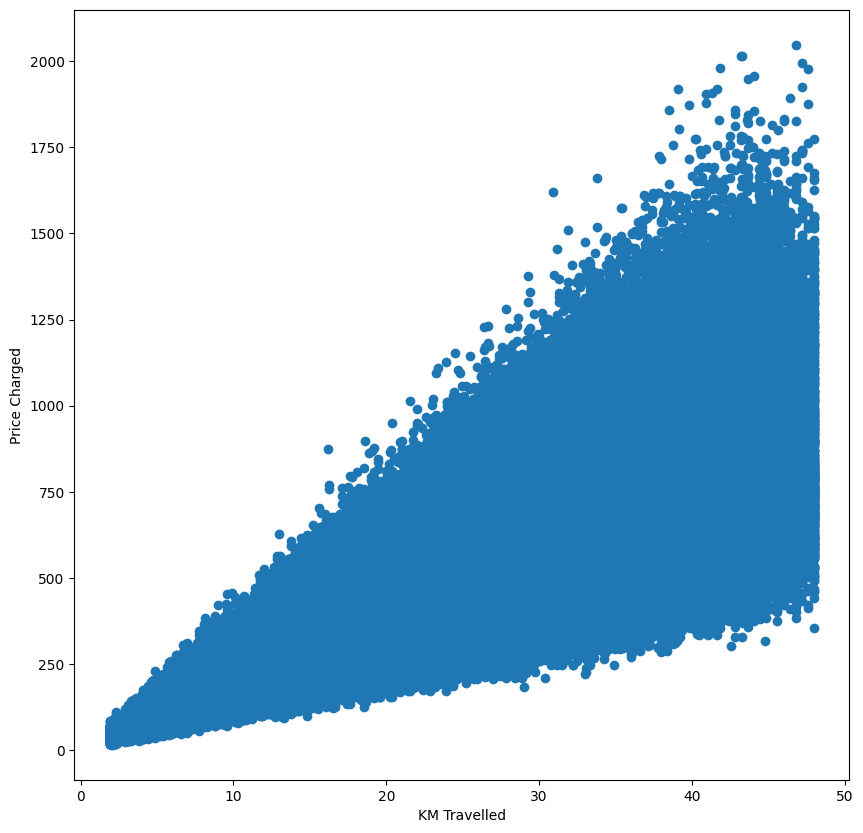

In [166]:
#scatter plot to show the correlation between price charged and kms travelled
plt.figure(figsize=(10,10))
plt.scatter(cab_transaction_customer_city['KM Travelled'], cab_transaction_customer_city['Price Charged'])
plt.xlabel('KM Travelled')
plt.ylabel('Price Charged')
plt.show()


#Conclusion : There is a strong correlation between the price charged and kms travelled


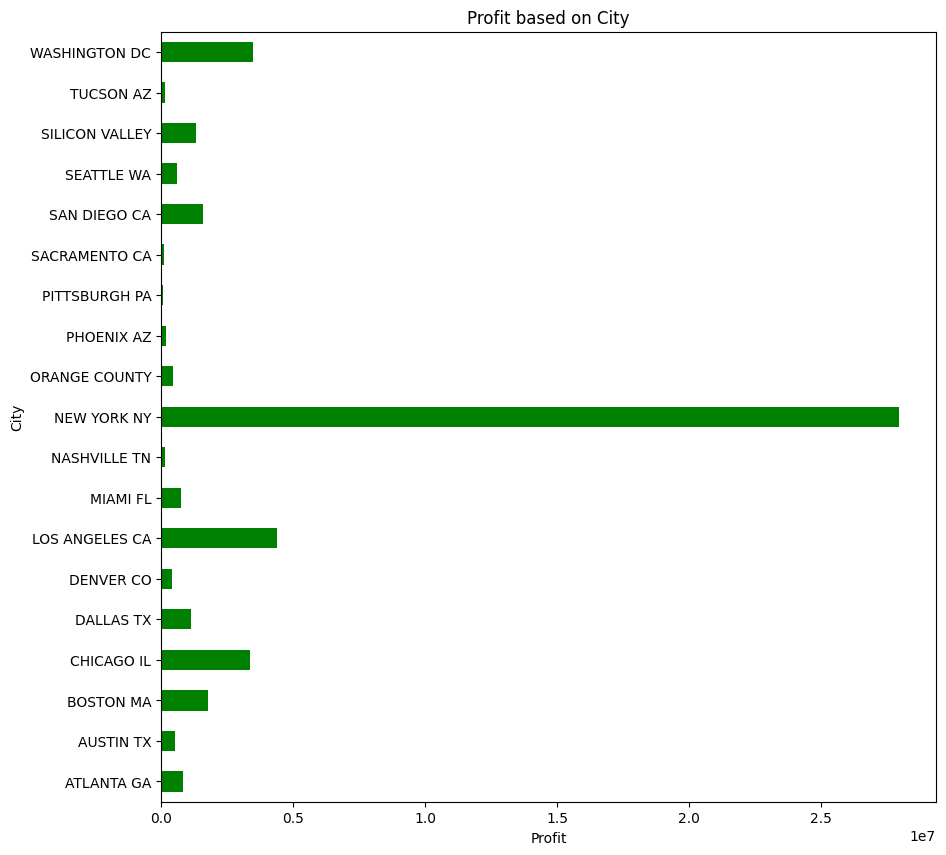

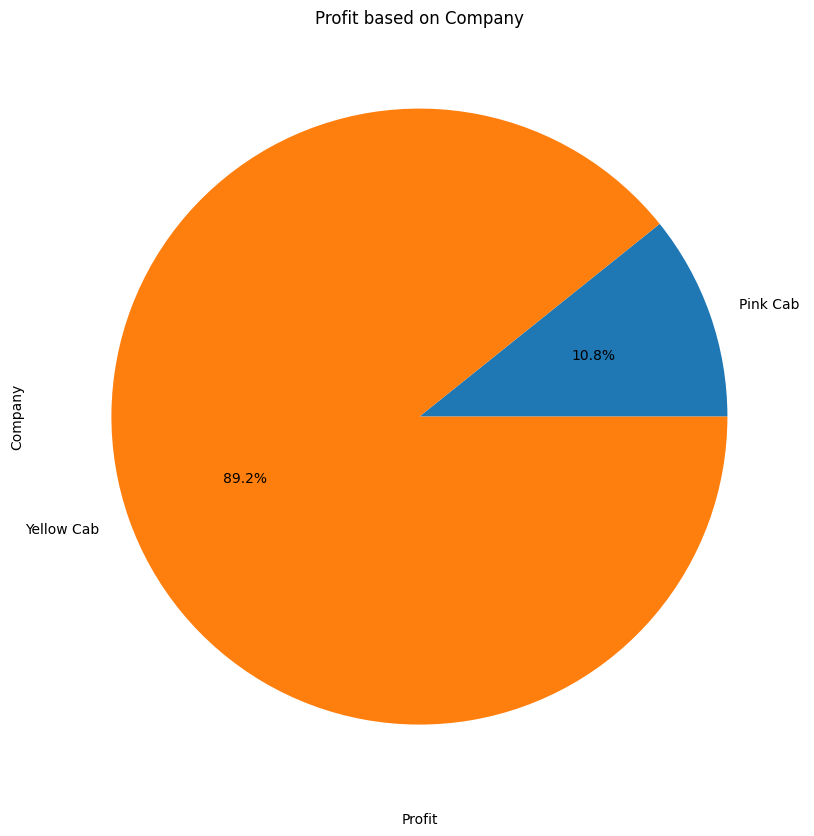

In [167]:
#add profit column to the dataset 
cab_transaction_customer_city['Profit'] = cab_transaction_customer_city['Price Charged'] - cab_transaction_customer_city['Cost of Trip']
cab_transaction_customer_city.head()

#make a visual horizontal histogram graph to show the profit of the company based on each city
#profit based on city
profit_city = cab_transaction_customer_city.groupby('City')['Profit'].sum()
profit_city.head()

#plotting the horizontal histogram chart
plt.figure(figsize=(10, 10))
profit_city.plot(kind='barh', color='green')
plt.xlabel('Profit')
plt.ylabel('City')
plt.title('Profit based on City')
plt.show()

#Conclusion : Highest profit is in New York City and lowest profit is in Springfield


#make a visual pie graph to show the profit of the company based on each company
#profit based on company
profit_company = cab_transaction_customer_city.groupby('Company')['Profit'].sum()
profit_company.head()

#plotting the pie chart
plt.figure(figsize=(10, 10))
profit_company.plot(kind='pie', autopct='%1.1f%%')
plt.xlabel('Profit')
plt.ylabel('Company')
plt.title('Profit based on Company')
plt.show()


#Conclusion : Highest profit is in Pink Cab and lowest profit is in Yellow Cab

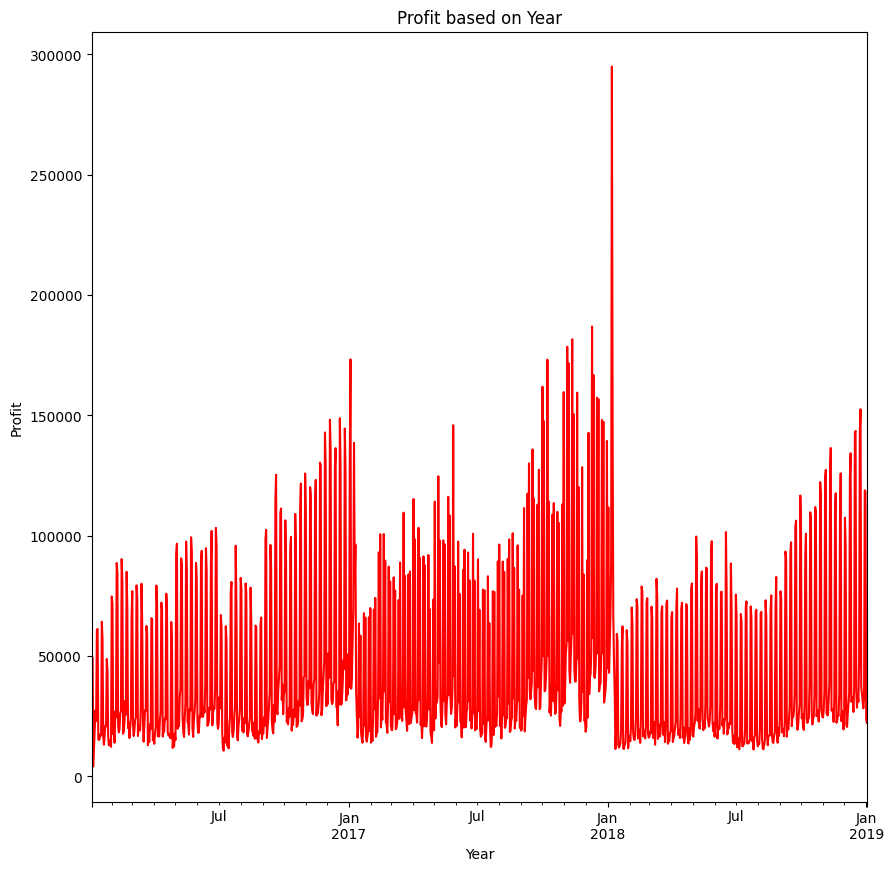

In [170]:
#line graph to show the profit of the company based on each year from 2016 to 2018
#profit based on year
profit_year = cab_transaction_customer_city.groupby('Date of Travel')['Profit'].sum()
profit_year.head()

#plotting the line graph
plt.figure(figsize=(10, 10))
profit_year.plot(kind='line', color='red')
plt.xlabel('Year')
plt.ylabel('Profit')
plt.title('Profit based on Year')
plt.show()

#Conclusion : Highest profit is in 2018 and lowest profit is in 2016
#Conclusion : Profit is highest during the months  of December and January and lowest during the month of February


